# DATA CLEANING and PRE_PROCESSING

## Introdução

Depois da extração das características necessárias para o treino dos modelos de classificação, neste documento, iremos tratar da limpeza e pré-processamento dos dados, assegurando assim uma compatibilidade e qualidade dos mesmos para obtermos algoritmos de aprendizagem computacional eficazes



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pylidc_df = pd.read_csv('pylidc_features.csv')
pyradiomics_df = pd.read_csv('pyradiomics_features.csv')

Malignidade: [1 2 3 4 5]
Número de Instâncias: [1020 1580 2606  962  691]


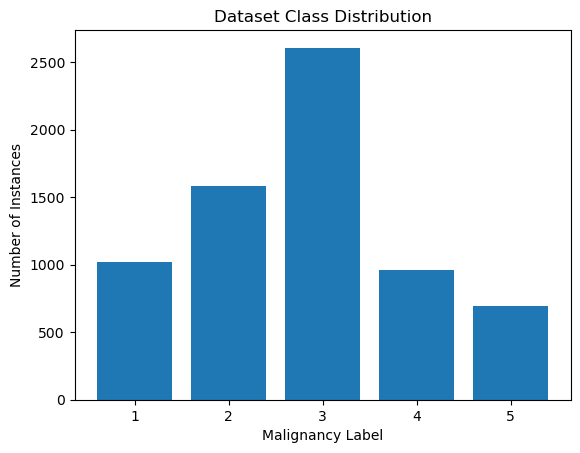

In [13]:
unique_label, count = np.unique(pylidc_df.malignancy, return_counts = True)
plt.bar(unique_label, count)
plt.xlabel('Malignancy Label')
plt.ylabel('Number of Instances')
plt.title('Dataset Class Distribution')

print(f'Malignidade: {unique_label}\nNúmero de Instâncias: {count}')

## Problema de Classificação Binário

De forma a tornar o nosso pr

In [14]:
for j in range (len(pylidc_df)):
    if pylidc_df.at[j, 'malignancy'] == 4 or pylidc_df.at[j, 'malignancy'] == 5:
        pylidc_df.at[j, 'malignancy'] = 1
    elif pylidc_df.at[j, 'malignancy'] == 1 or pylidc_df.at[j, 'malignancy'] == 2:
        pylidc_df.at[j, 'malignancy'] = 0

Malignidade: [0 1 3]
Número de Instâncias: [2600 1653 2606]


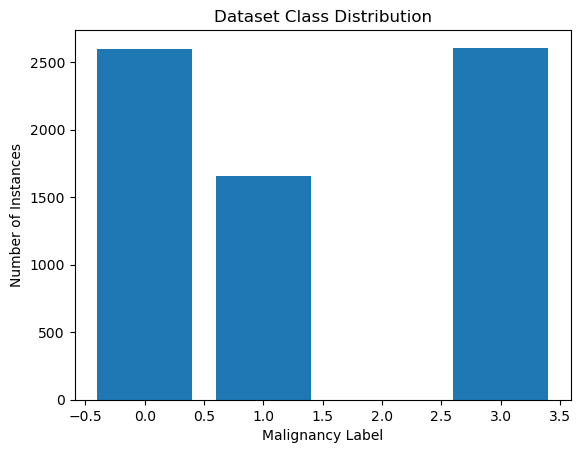

In [15]:
unique_label, count = np.unique(pylidc_df.malignancy, return_counts = True)
plt.bar(unique_label, count)
plt.xlabel('Malignancy Label')
plt.ylabel('Number of Instances')
plt.title('Dataset Class Distribution')

print(f'Malignidade: {unique_label}\nNúmero de Instâncias: {count}')

## Remoção dos Casos Indeterminados

Malignidade: [0 1]
Número de Instâncias: [2600 1653]


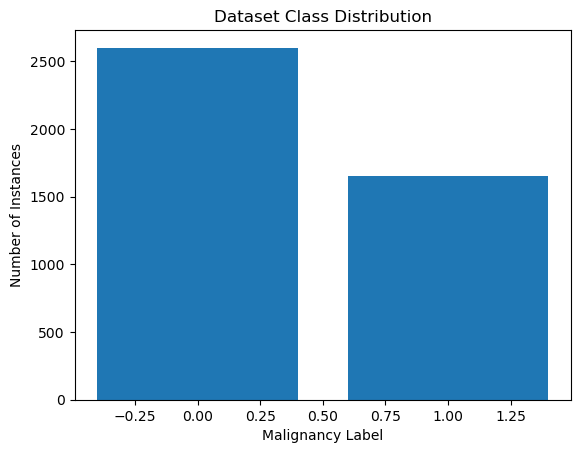

In [16]:
pylidc_df = pylidc_df[pylidc_df['malignancy'] != 3]

unique_label, count = np.unique(pylidc_df.malignancy, return_counts = True)
plt.bar(unique_label, count)
plt.xlabel('Malignancy Label')
plt.ylabel('Number of Instances')
plt.title('Dataset Class Distribution')

print(f'Malignidade: {unique_label}\nNúmero de Instâncias: {count}')

## Junção dos Datasets

Depois de transformar a variável objetivo ('malignancy') em formato binário, o próximo passo é juntar ambos os datasets das características ('pyradiomics_df' e 'pylidc_df').

Primeiramente, vamos analisar o formato de cada um dos dataframes:

In [17]:
print(f'Formato Pylidc: {pylidc_df.shape}\nFormato Pyradiomics:{pyradiomics_df.shape}')

Formato Pylidc: (4253, 15)
Formato Pyradiomics:(6859, 108)


Em seguida, iremos juntar ambos os datasets utilizando o método 'merge' do pandas:

In [19]:
final_df = pyradiomics_df.merge(pylidc_df, left_on = 'case_id', right_on = 'case_id')
print(f'Formato do Dataset Final: {final_df.shape}')
final_df.head()

Formato do Dataset Final: (4253, 122)


,case_id,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0001_12_84,0.971629,0.246297,8.235017,33.435268,48.010416,47.010637,38.013156,48.020829,5864.541667,...,6,3,3,3,4,5,32.205888,2801.428431,7869.369507,1
1,LIDC-IDRI-0001_12_85,0.933907,0.213370,6.940565,32.528335,39.051248,45.803930,40.000000,46.904158,4556.708333,...,6,4,4,5,5,5,33.188692,2198.454852,6146.438599,1
2,LIDC-IDRI-0001_12_86,0.971849,0.237372,7.523759,31.696116,38.013156,44.045431,35.128336,47.675990,4912.708333,...,6,3,2,3,3,5,31.959332,2392.704188,6594.474792,1
3,LIDC-IDRI-0001_12_87,0.944220,0.253654,8.264833,32.583138,45.011110,46.065171,35.014283,51.303021,5434.500000,...,6,5,4,1,5,4,33.669337,2573.278820,7348.411560,1
4,LIDC-IDRI-0002_13_88,0.751149,0.548785,18.996136,34.614919,34.176015,45.177428,48.093659,51.176166,10245.750000,...,6,5,1,1,1,1,30.023172,2880.758652,6576.900681,1


## Remoção de Colunas

Remoção de colunas que contenham valores constantes ou nulos:

In [21]:
# Remoção de colunas em que o valor é constante (igual em todas as linhas)
for column in final_df.columns:
    if len(final_df[column].unique()) == 1:
        final_df = final_df.drop(columns=column)

# Remoção de colunas com valores nulos
for column in final_df.columns:
    na_count = final_df[column].isnull().sum()
    if na_count >= 1:
        final_df = final_df.drop(columns=column)

Depois de removidas as colunas, analisamos o 'final_df' novamente:

In [24]:
final_df.shape

(4253, 122)

In [25]:
final_df.dtypes.value_counts()

float64    112
int64        9
object       1
Name: count, dtype: int64

In [26]:
df_groupby_dtypes = final_df.columns.to_series().groupby(final_df.dtypes).groups

for key, value in df_groupby_dtypes.items():
    if key == 'object':
        print(value)

Index(['case_id'], dtype='object')


## Colunas com Correlação Baixa

Eliminamos colunas com uma correlação com a 'malignancy' menor que 20% (correlação < 0.2), assegurando assim que o dataset utilizado para treinar os modelos contém apenas as características com maior informação

In [31]:
index = final_df[['case_id']]
features = final_df.drop(columns = ['case_id'])

In [32]:
features_correlation = features.corr()['malignancy']
feat_to_eliminate = features_correlation[abs(features_correlation) < 0.2].index
max_information_df = features.drop(columns = feat_to_eliminate)
max_information_df.shape

(4253, 76)

In [33]:
final_df = pd.concat([index, max_information_df], axis = 1)
final_df.shape

(4253, 77)

## Conclusão

In [34]:
final_df.to_csv('final_features.csv', sep = ',', index = False)